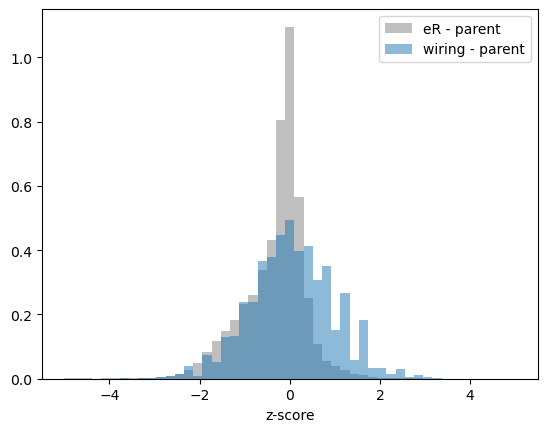

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import sys
import warnings
warnings.filterwarnings('ignore')
import time
from itertools import permutations, combinations, product, islice
import pandas as pd
from core_enum import fl


## LOAD
df_er = pd.read_pickle('data/df_pte_268533')
df_alt = pd.read_pickle('data/df_pte_268536_alt')
df_alt_branch = pd.read_pickle('data/df_pte_268536_alt_branch')
#
deR_alt = df_alt['eR'].values - df_alt['eR_source'].values
# zscores_alt = (deR_alt-deR_alt.mean()) / deR_alt.std()
zscores_alt = deR_alt / df_alt['eR'].std()
#
deR = df_er['eR'].values - df_er.loc[df_er['source'].values, 'eR']
# zscores_eR = (deR-deR.mean()) / deR.std()
zscores_eR = deR / df_er['eR'].std()

## PLOT: zscore hist
plt.hist(zscores_eR, bins=np.linspace(-5,5,50), alpha=.5, density=True, label='eR - parent', color='gray')
plt.hist(zscores_alt, bins=np.linspace(-5,5,50), alpha=.5, density=True, label='wiring - parent', color='tab:blue')
plt.xlabel('z-score')
plt.legend()
plt.savefig('fig/resub_er_vs_alt_zscore.pdf', dpi=300)

In [24]:
## RUN: count alt-gpn
alt_thres = .37
tar_list = df_alt_branch[df_alt_branch['eR']<alt_thres]['target'].values
tar_all_list = sorted(set(fl(df_alt_branch.loc[tar_list, 'branch'])))
tar_conn_list = [x for x in tar_all_list if x not in tar_list]

## df_alt_branch
df_gpn_alt = df_alt_branch.loc[tar_all_list]
# df_gpn_alt.to_csv('gephi/df_gpn_alt.csv', index=False)

## count
n_all_alt = len(df_gpn_alt)
n_good_alt = len(df_gpn_alt[df_gpn_alt['eR']<alt_thres])
n_good_alt, n_all_alt-n_good_alt

(4208, 607)

In [27]:
## RUN: count eR-gpn
df_gpn = pd.read_pickle('data/df_gpn')
eR_thres = df_gpn.loc[0, 'eR']

## count
n_all_eR = len(df_gpn)
n_good_eR = len(df_gpn[df_gpn['eR']>=eR_thres])
n_good_eR, n_all_eR-n_good_eR

(4230, 262)